In [1]:
import keras
from keras.datasets import reuters

In [2]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data), len(test_data))

8982 2246


In [4]:
print(train_data[0], train_label[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 3


In [5]:
import numpy as np

def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))

    for i, sequence in enumerate(sequence):
        for j in sequence:
            results[i,j] = 1.
    return results


In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

In [9]:
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [10]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

2025-01-10 15:52:39.637249: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-01-10 15:52:39.637291: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-10 15:52:39.637300: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-10 15:52:39.637328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-10 15:52:39.637339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [12]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20


2025-01-10 15:52:40.581412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4261 - loss: 3.0032 - val_accuracy: 0.6170 - val_loss: 1.7460
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6717 - loss: 1.5703 - val_accuracy: 0.7090 - val_loss: 1.3234
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7509 - loss: 1.1763 - val_accuracy: 0.7500 - val_loss: 1.1666
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7998 - loss: 0.9460 - val_accuracy: 0.7690 - val_loss: 1.0806
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8370 - loss: 0.7734 - val_accuracy: 0.7830 - val_loss: 0.9777
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8623 - loss: 0.6444 - val_accuracy: 0.8020 - val_loss: 0.9390
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8855 - loss: 0.5392 - val_accuracy: 0.8140 - val_loss: 0.8865
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9107 - loss: 0.4447 - val_accuracy: 0.8170 - val_loss: 0.

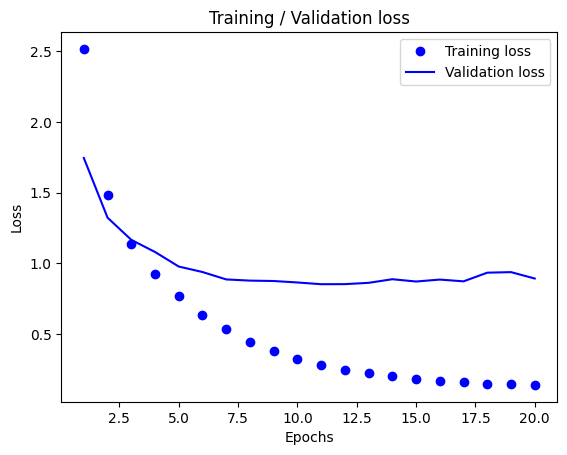

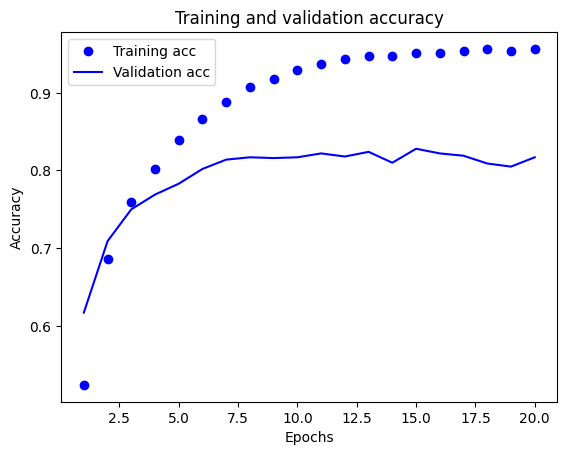

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training / Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
preds = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [16]:
preds[0].shape

(46,)

In [17]:
np.argmax(preds[0])

3